# Sign Language digits data set

* 2062 images
* digits are from 0 to 9, therefore 10 unique sign.
    * At the beginning, we will use only sign 0 and 1 for simplicity.
        * sign zero: indexes 204-408, Number of zero sign is 205
        * sign one: indexes 822-1027, Number of one sign is 206
            * We will use 205 samples from each classes(labels)
            * for deep learning, 205 samples are very very little.
            

In [2]:
import numpy as np
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')
from subprocess import check_output
# print(check_output(["ls", "../input"]).decode("utf8"))
# Any results you write to the current directory are saved as output.

(-0.5, 63.5, 63.5, -0.5)

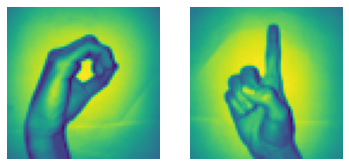

In [3]:
# load data set
x_l = np.load('Sign-language-digits-dataset_X.npy')
Y_l = np.load('Sign-language-digits-dataset_Y.npy')
img_size = 64
plt.subplot(1, 2, 1)
plt.imshow(x_l[260].reshape(img_size, img_size))
plt.axis('off')
plt.subplot(1, 2, 2)
plt.imshow(x_l[900].reshape(img_size, img_size))
plt.axis('off')

In [4]:
# Join a sequence of arrays along an row axis.
X = np.concatenate((x_l[204:409], x_l[822:1027] ), axis=0) # from 0 to 204 is zero sign and from 205 to 410 is one sign 
z = np.zeros(205)
o = np.ones(205)
Y = np.concatenate((z, o), axis=0).reshape(X.shape[0],1)
print("X shape: " , X.shape)
print("Y shape: " , Y.shape)

X shape:  (410, 64, 64)
Y shape:  (410, 1)


In [5]:
# Then lets create x_train, y_train, x_test, y_test arrays
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15, random_state=42)
number_of_train = X_train.shape[0]
number_of_test = X_test.shape[0]

In [6]:
X_train_flatten = X_train.reshape(number_of_train,X_train.shape[1]*X_train.shape[2])
X_test_flatten = X_test .reshape(number_of_test,X_test.shape[1]*X_test.shape[2])
print("X train flatten",X_train_flatten.shape)
print("X test flatten",X_test_flatten.shape)

X train flatten (348, 4096)
X test flatten (62, 4096)


In [7]:
x_train = X_train_flatten.T
x_test = X_test_flatten.T
y_train = Y_train.T
y_test = Y_test.T
print("x train: ",x_train.shape)
print("x test: ",x_test.shape)
print("y train: ",y_train.shape)
print("y test: ",y_test.shape)

x train:  (4096, 348)
x test:  (4096, 62)
y train:  (1, 348)
y test:  (1, 62)


## EDA
* X-array: image array (zero and one signs)
* Y-array: label array (0 and 1)


1. concatenate zero sign and one sign arrays
2. labeling array 0 for zero sign, 1 for one sign images

X_shape: 410 images, 64 * 64 pixels
Y_shape: 410 labels of 0 and 1

3. split X and Y into train and test sets.
    * test_size: 15%
    * train_size: 75%
    * random_state: 42
4. Flatten (3D -> 2D) X_array (images) for the deep learning input.
5. label array (Y) is already 2D.
6. Transpose both X and Y

## Logistic Regression

* For binary classification, logistic regression (simple deep learning)
* Computation Graph（計算グラフ）: visualization mathmatical expressions 
    * for logistic regression
        * Parameters: weight, bias
            * Weights: coefficients of each pixels
            * Bias: intercept
        * z = b + px1w1...
        * y_head = sigmoid(z)
            * Sigmoid function makes z between zero and one in probability.
                * Why using sigmoid?
                    * To get a probabilistic result.
                    * It is derivative and needed for gradient descent algorithm.
                    

### Initializing parameters

* input: images (4096 pixels)
    * Each pixels have own weights.

1. Multiplying each pixels with their own weights.
2. Initial weight: 0.01 (for now)
    * weight.shape: (4096, 1)
    * Because weight is given for each pixels.
3. Initial bias: 0

In [8]:
# lets initialize parameters
# So what we need is dimension 4096 that is number of pixels as a parameter for our initialize method(def)
def initialize_weights_and_bias(dimension):
    w = np.full((dimension,1),0.01)
    b = 0.0
    return w, b

In [9]:
w, b = initialize_weights_and_bias(4096)

### Foward Propagation

1. z = (w.T)x + b
    * x: pixel array
    * w: weights
    * b: bias
2. Put z in sigmoid function
    * Returns y_head(probability)
3. Calculate loss(error) function.
4. "Cost function is summation of all loss(error)" <-- !!!

In [10]:
# calculation of z
#z = np.dot(w.T,x_train)+b
def sigmoid(z):
    y_head = 1/(1+np.exp(-z))
    return y_head

In [11]:
y_head = sigmoid(0)
y_head

0.5

### Foward Propagation (What is loss(error) function)

* Simply, if the prediction is right, loss is 0
* If the predicition is wrong, loss(error) is infinit.
* The cost function is summation of loss function.
    * Each image creates loss function.

In [12]:
# Forward propagation steps:
# find z = w.T*x+b
# y_head = sigmoid(z)
# loss(error) = loss(y,y_head)
# cost = sum(loss)

def forward_propagation(w,b,x_train,y_train):
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z) # probabilistic 0-1
    #####
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    #####
    cost = (np.sum(loss))/x_train.shape[1]      # x_train.shape[1] is for scaling
    #####
    return cost 

### Optimization Algorithm with Gradient Descent

* Let's decrease the cost(error) because as we know if cost is high, it means the prediction is wrong.
* First of all, everything starts with initializing weights and bias. (therefore cost is dependent with them)
    * In order to decrease cost, we need to update weights and bias.
    * The model needs to learn the parameters weights and bias to minimize the cost function.
    * This technique is called gradient descent.

Gradient Descent process
1. w = 5, bias = 0
    * After forward propagation, cost_function = 1.5
2. w := w - slope1 
    * If slope1 = 3
        * new weight = 2
3. w = 2, bias = 0
    * After another forward propagation, cost_function = 0.4
4. w := w - slope2
    * If slope2 = 0.7 and w = 2
        * new weight = 1.3
5. w = 1.3, bias = 0
    * Another forward propagation with w =1.3, cost_function = 0.3
6. w := w - slope3
    * If slope3 = 0.01 and w = 1.3
        * new weight = 1.29~1.3
            * weight didn't change because of minimum point of cost_function.
7. forward propagation: from weights and bias to cost
8. backward propagation: from cost to weights and bias to update them
9. **Google it! "derivative of log loss function"**

### Backward Propagation

1. Use y_head that found in foward propagation.
2. Instead of writing backward propagation method, combine with foward propagation.

In [13]:
def forward_backward_propagation(w, b, x_train, y_train):
    # forward propagation
    z = np.dot(w.T, x_train) + b
    y_head = sigmoid(z)
    loss = -y_train * np.log(y_head) - (1-y_train) * np.log(1-y_head)
    cost = (np.sum(loss)) / x_train.shape[1]
    
    # backward propagation
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1] ### 要チェック
    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1] ### 要チェック
    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias}

    return cost, gradients

ここまでの経過

* Initializing parameters
* Finding cost through forward_propagation and cost_function
* Updating (learning) parameters (weight and bias).

In [14]:
# Updating(learning) parameters

def update(w, b, x_train, y_train, learning_rate, number_of_iterarion):
    cost_list = []
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is "number_of_iterarion" times
    # "number_of_iteration"分、パラメータの更新を実行する。
    
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost, gradients = forward_backward_propagation(w, b, x_train, y_train)
        cost_list.append(cost)
        
        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]
        if i % 10 == 0: # 10で割り切って余りが0の場合
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
            
    # we update(learn) parameters weights and bias
    parameters = {"weight": w, "bias": b}
    
    plt.plot(index,cost_list2)
    plt.xticks(index, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list
# parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate = 0.009,number_of_iterarion = 200)

* Since we got the parameters, let's predict (sigmoid).
* Use x_test as an input.

In [15]:
# prediction

def predict(w, b, x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T, x_test) + b)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

# predict(parameters["weight"],parameters["bias"],x_test)

Cost after iteration 0: 14.014222
Cost after iteration 10: 2.544689
Cost after iteration 20: 2.577950
Cost after iteration 30: 2.397999
Cost after iteration 40: 2.185019
Cost after iteration 50: 1.968348
Cost after iteration 60: 1.754195
Cost after iteration 70: 1.535079
Cost after iteration 80: 1.297567
Cost after iteration 90: 1.031919
Cost after iteration 100: 0.737019
Cost after iteration 110: 0.441355
Cost after iteration 120: 0.252278
Cost after iteration 130: 0.205168
Cost after iteration 140: 0.196168


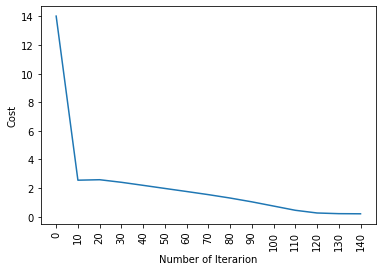

train accuracy: 92.816091954023 %
test accuracy: 93.54838709677419 %


In [16]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate, num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 4096
    w, b = initialize_weights_and_bias(dimension)
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate, num_iterations)
    
    y_prediction_test = predict(parameters["weight"], parameters["bias"], x_test)
    y_prediction_train = predict(parameters["weight"], parameters["bias"], x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test, learning_rate = 0.01, num_iterations = 150)

### Logistic Regression with Sklearn

* Using logistic regression method from Sklearn, we get different accuracy.
    * It is because of this method uses a lot of different features that we do not use like different optimization parameters.

## Artificial Neural Network (ANN)

* Also called deep neural network or deep learning.
* Neural Network: Basically, taking logistic regression and repeating it at least 2 times.
* In logistic regression, there are input and output layers. 
    * However, in neural network, there is at least one hidden layer between input and output layer.
    * How deep is "deep"?
        * 32 years ago: 2-3 layers
        * few years ago: 20 layers
        * 2019: 152 layers for commercial (by Andrew Ng)
        * Current: 1000- layers (for experiment)
* Input layer + One hidden layer + Output layer = 2 layers

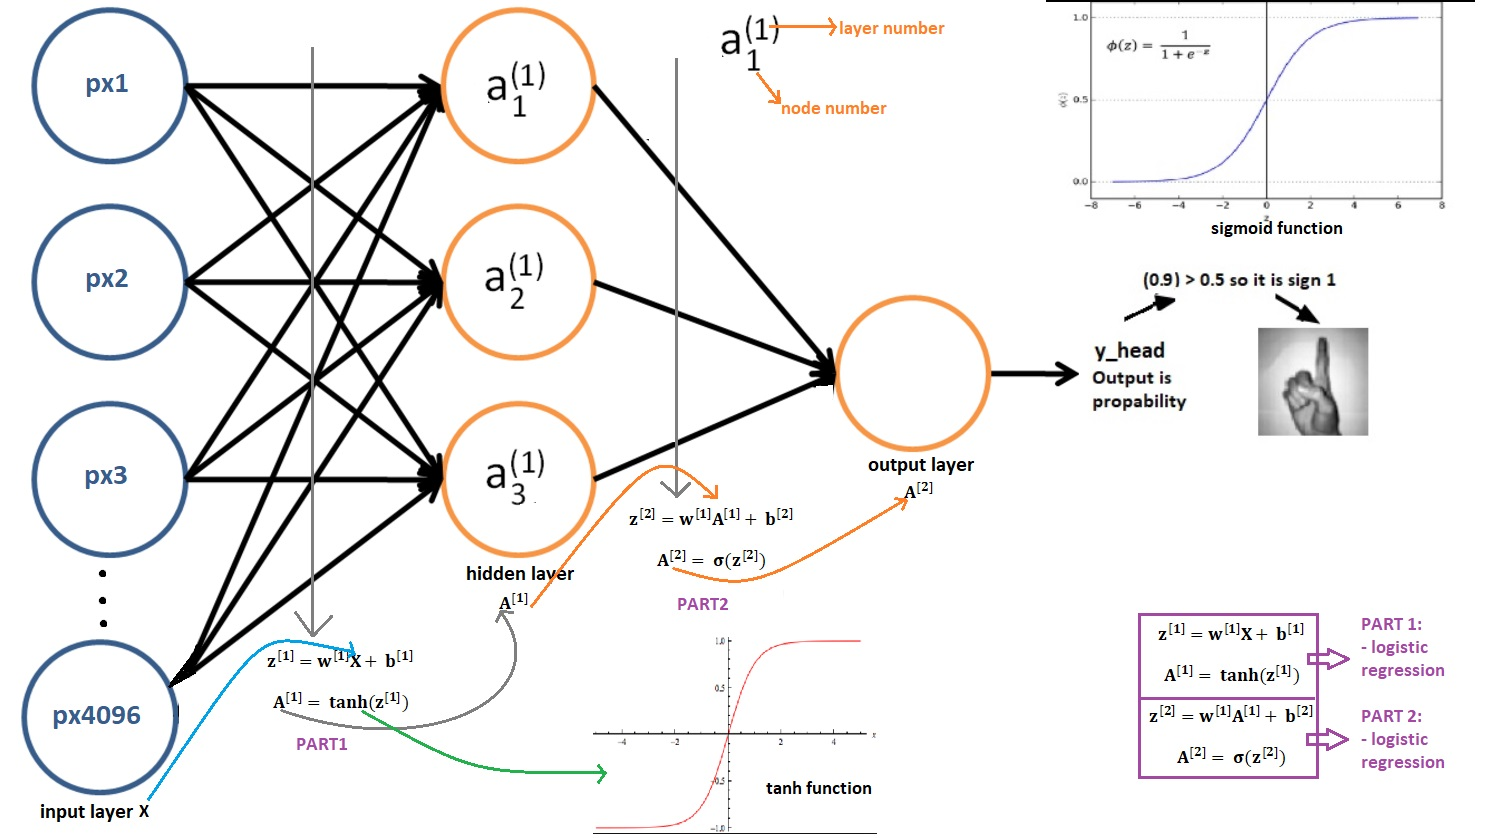

In [19]:
from IPython.display import Image
Image(filename='Kaggle_2_image_01.jpg') 

* The image above shows 3 nodes. 
    * Number of nodes could be variable. 
    * Nodes work as a hyperparameters.
* The image uses tanh instead of sigmoid.
    * For hidden units, tanh is better than sigmoid.
    * Because mean of its output is closer to zero so it centers the data better for the next layer.
    * tanh is also good because of increasing non-linearity which cause better learing.
* The purple word; "PART1", "PART2", have two differences.
    * whether using activation function
    * inputs and outputs

## Overall step for 2-Layer Neural Network

### Size of layers and initializing parameters weights and bias.
* Previously, we initialize weights 0.01 and bias 0.
* At this time, we initialize weights randomly.
    * Because if we initialize parameters zero, each neuron in the first hidden layer will perform the same computation.
        * To avoid each neuron in the layer computing same things as other neurons.
* Bias can be zero initially.

In [20]:
# intialize parameters and layer sizes
def initialize_parameters_and_layer_sizes_NN(x_train, y_train):
    parameters = {"weight1": np.random.randn(3, x_train.shape[0]) * 0.1,
                  "bias1": np.zeros((3,1)),
                  "weight2": np.random.randn(y_train.shape[0], 3) * 0.1,
                  "bias2": np.zeros((y_train.shape[0], 1))}
    return parameters

### Forward Propagation

* Almost same with logistic regression.
* This one uses tanh function (using numpy) and make all process twice.

In [21]:
# Forward Propagation

def forward_propagation_NN(x_train, parameters):

    Z1 = np.dot(parameters["weight1"], x_train) + parameters["bias1"]
    A1 = np.tanh(Z1)
    Z2 = np.dot(parameters["weight2"], A1) + parameters["bias2"]
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

### Loss function and Cost function （損失関数とコスト関数 a.k.a. 交差エントロピー誤差）

* Using Cross-entropy-function

In [22]:
# Compute cost

def compute_cost_NN(A2, Y, parameters):
    logprobs = np.multiply(np.log(A2), Y)
    cost = -np.sum(logprobs)/Y.shape[1]
    return cost

### Backward propagation

* Backward propagation = derivative（微分）
* **Watch YOUTUBE!!!**

In [25]:
# Backward Propagation

def backward_propagation_NN(parameters, cache, X, Y):

    dZ2 = cache["A2"] - Y
    dW2 = np.dot(dZ2,cache["A1"].T)/X.shape[1]
    db2 = np.sum(dZ2,axis = 1, keepdims=True)/X.shape[1]
    dZ1 = np.dot(parameters["weight2"].T, dZ2)*(1 - np.power(cache["A1"], 2))
    dW1 = np.dot(dZ1,X.T)/X.shape[1]
    db1 = np.sum(dZ1,axis = 1, keepdims=True)/X.shape[1]
    grads = {"dweight1": dW1,
             "dbias1": db1,
             "dweight2": dW2,
             "dbias2": db2}
    return grads

### Update Parameters

In [27]:
# Update parameters

def update_parameters_NN(parameters, grads, learning_rate = 0.01):
    parameters = {"weight1": parameters["weight1"] - learning_rate*grads["dweight1"],
                  "bias1": parameters["bias1"] - learning_rate*grads["dbias1"],
                  "weight2": parameters["weight2"] - learning_rate*grads["dweight2"],
                  "bias2": parameters["bias2"] - learning_rate*grads["dbias2"]}
    
    return parameters

### Prediction with learnt parameters weight and bias

In [28]:
# Prediction

def predict_NN(parameters, x_test):
    # x_test is a input for forward propagation
    A2, cache = forward_propagation_NN(x_test, parameters)
    Y_prediction = np.zeros((1, x_test.shape[1]))
    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(A2.shape[1]):
        if A2[0,i]<= 0.5:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

### Combine all

Cost after iteration 0: 0.326568
Cost after iteration 100: 0.333251
Cost after iteration 200: 0.327568
Cost after iteration 300: 0.304597
Cost after iteration 400: 0.268128
Cost after iteration 500: 0.228546
Cost after iteration 600: 0.192172
Cost after iteration 700: 0.161310
Cost after iteration 800: 0.136018
Cost after iteration 900: 0.115002
Cost after iteration 1000: 0.100092
Cost after iteration 1100: 0.086402
Cost after iteration 1200: 0.075296
Cost after iteration 1300: 0.066211
Cost after iteration 1400: 0.058634
Cost after iteration 1500: 0.052215
Cost after iteration 1600: 0.046697
Cost after iteration 1700: 0.041926
Cost after iteration 1800: 0.037804
Cost after iteration 1900: 0.034211
Cost after iteration 2000: 0.031022
Cost after iteration 2100: 0.028182
Cost after iteration 2200: 0.025723
Cost after iteration 2300: 0.023654
Cost after iteration 2400: 0.021911


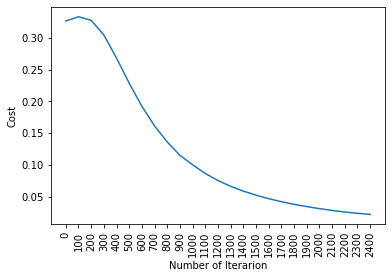

train accuracy: 100.0 %
test accuracy: 93.54838709677419 %


In [29]:
# 2 - Layer neural network
def two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations):
    cost_list = []
    index_list = []
    #initialize parameters and layer sizes
    parameters = initialize_parameters_and_layer_sizes_NN(x_train, y_train)

    for i in range(0, num_iterations):
         # forward propagation
        A2, cache = forward_propagation_NN(x_train, parameters)
        # compute cost
        cost = compute_cost_NN(A2, y_train, parameters)
         # backward propagation
        grads = backward_propagation_NN(parameters, cache, x_train, y_train)
         # update parameters
        parameters = update_parameters_NN(parameters, grads)
        
        if i % 100 == 0:
            cost_list.append(cost)
            index_list.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))
    plt.plot(index_list, cost_list)
    plt.xticks(index_list, rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    
    # predict
    y_prediction_test = predict_NN(parameters, x_test)
    y_prediction_train = predict_NN(parameters, x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    return parameters

parameters = two_layer_neural_network(x_train, y_train, x_test, y_test, num_iterations=2500)

## L-Layer Neural Network

* **"What happens if number of hidden layer increase?"**
* More layers could learn more complex functions.
* Hyperparameters:
    * learning rate
    * number of iterations
    * number of hidden layer
    * number of hidden units
    * type of activation functions
    
* For this example:
    * learning rate
    * number of iterations: 100
    * number of hidden layer: 2 hidden layers (3 layers)
    * number of hidden units: 8 and 4 nodes
    * type of activation functions: relu(first_layer), relu(second_layer), sigmoid(output_layer)

In [30]:
# reshaping
x_train, x_test, y_train, y_test = x_train.T, x_test.T, y_train.T, y_test.T

### Implementing with keras library

* units: output dimensions of node
* kernel_initializer: to initialize weights
* activation: activation function, we use relu
* input_dim: input dimension that is the number of pixels in our images (e.g. 4096 px)
* optimizer: we use adam optimizer
    * One of the most effective optimization algorithms for training neural networks.
    * Some advantages of Adam is that relatively low memory requirements.
* loss: Using cross-entropy cost function.
* metrics: Accuracy
* cross_val_score: Using the cross validation.
* epochs: Number of iteration.

In [31]:
# Evaluating the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential # initialize neural network library
from keras.layers import Dense # build our layers library

def build_classifier():
    classifier = Sequential() # initialize neural network
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = x_train.shape[1]))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

classifier = KerasClassifier(build_fn = build_classifier, epochs = 100)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()

print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))

Using TensorFlow backend.


Epoch 1/100
232/232 [==============================] - 0s 649us/step - loss: 0.6929 - accuracy: 0.5086
Epoch 2/100
232/232 [==============================] - 0s 47us/step - loss: 0.6918 - accuracy: 0.5431
Epoch 3/100
232/232 [==============================] - 0s 43us/step - loss: 0.6906 - accuracy: 0.5431
Epoch 4/100
232/232 [==============================] - 0s 43us/step - loss: 0.6893 - accuracy: 0.5431
Epoch 5/100
232/232 [==============================] - 0s 47us/step - loss: 0.6870 - accuracy: 0.5431
Epoch 6/100
232/232 [==============================] - 0s 52us/step - loss: 0.6851 - accuracy: 0.5431
Epoch 7/100
232/232 [==============================] - 0s 47us/step - loss: 0.6826 - accuracy: 0.5431
Epoch 8/100
232/232 [==============================] - 0s 52us/step - loss: 0.6789 - accuracy: 0.5431
Epoch 9/100
232/232 [==============================] - 0s 52us/step - loss: 0.6725 - accuracy: 0.5431
Epoch 10/100
232/232 [==============================] - 0s 52us/step - loss: 0.66

232/232 [==============================] - 0s 52us/step - loss: 0.0639 - accuracy: 0.9741
Epoch 81/100
232/232 [==============================] - 0s 43us/step - loss: 0.0700 - accuracy: 0.9698
Epoch 82/100
232/232 [==============================] - 0s 52us/step - loss: 0.0616 - accuracy: 0.9698
Epoch 83/100
232/232 [==============================] - 0s 47us/step - loss: 0.0593 - accuracy: 0.9828
Epoch 84/100
232/232 [==============================] - 0s 47us/step - loss: 0.0649 - accuracy: 0.9741
Epoch 85/100
232/232 [==============================] - 0s 56us/step - loss: 0.0620 - accuracy: 0.9698
Epoch 86/100
232/232 [==============================] - 0s 52us/step - loss: 0.0701 - accuracy: 0.9784
Epoch 87/100
232/232 [==============================] - 0s 47us/step - loss: 0.0575 - accuracy: 0.9741
Epoch 88/100
232/232 [==============================] - 0s 56us/step - loss: 0.0535 - accuracy: 0.9828
Epoch 89/100
232/232 [==============================] - 0s 43us/step - loss: 0.0555 - 

232/232 [==============================] - 0s 43us/step - loss: 0.3197 - accuracy: 0.9741
Epoch 59/100
232/232 [==============================] - 0s 43us/step - loss: 0.3115 - accuracy: 0.9569
Epoch 60/100
232/232 [==============================] - 0s 39us/step - loss: 0.3130 - accuracy: 0.9784
Epoch 61/100
232/232 [==============================] - 0s 52us/step - loss: 0.3084 - accuracy: 0.9612
Epoch 62/100
232/232 [==============================] - 0s 52us/step - loss: 0.3063 - accuracy: 0.9784
Epoch 63/100
232/232 [==============================] - 0s 43us/step - loss: 0.3111 - accuracy: 0.9440
Epoch 64/100
232/232 [==============================] - 0s 52us/step - loss: 0.3002 - accuracy: 0.9698
Epoch 65/100
232/232 [==============================] - 0s 43us/step - loss: 0.2992 - accuracy: 0.9741
Epoch 66/100
232/232 [==============================] - 0s 43us/step - loss: 0.3044 - accuracy: 0.9440
Epoch 67/100
232/232 [==============================] - 0s 47us/step - loss: 0.2950 - 

232/232 [==============================] - 0s 43us/step - loss: 0.1238 - accuracy: 0.9698
Epoch 38/100
232/232 [==============================] - 0s 43us/step - loss: 0.1093 - accuracy: 0.9569
Epoch 39/100
232/232 [==============================] - 0s 52us/step - loss: 0.1050 - accuracy: 0.9655
Epoch 40/100
232/232 [==============================] - 0s 56us/step - loss: 0.1054 - accuracy: 0.9698
Epoch 41/100
232/232 [==============================] - 0s 47us/step - loss: 0.0976 - accuracy: 0.9784
Epoch 42/100
232/232 [==============================] - 0s 52us/step - loss: 0.0941 - accuracy: 0.9741
Epoch 43/100
232/232 [==============================] - 0s 56us/step - loss: 0.1000 - accuracy: 0.9698
Epoch 44/100
232/232 [==============================] - 0s 47us/step - loss: 0.1008 - accuracy: 0.9741
Epoch 45/100
232/232 [==============================] - 0s 52us/step - loss: 0.0998 - accuracy: 0.9784
Epoch 46/100
232/232 [==============================] - 0s 52us/step - loss: 0.1098 - 

## Conclusion

* This is still a shallow tutorial, specifically for the beginners.
* **If you want to learn more of the concept, watch Andrew Ng's video!**


In [34]:
from IPython.display import YouTubeVideo

YouTubeVideo('https://www.youtube.com/watch?v=UzxYlbK2c7E&list=PLA89DCFA6ADACE599', width=800, height=600)